# **Interpolación Numérica: Polinomios de Lagrange y Splines Cúbicos**

---



## 1. Introducción a la Interpolación

La interpolación numérica es una técnica fundamental en análisis numérico que permite construir una función que pase exactamente por un conjunto dado de puntos. Dada una colección de puntos $(x_i, y_i)$, el objetivo es encontrar una función $P(x)$ que satisfaga
$$
P(x_i) = y_i, \quad \text{para todo } i.
$$
Esta función puede usarse para estimar valores intermedios o aproximar una función desconocida.

---



## 2. Polinomios de Interpolación de Lagrange

### Definición

El polinomio de interpolación de Lagrange es una construcción explícita de un polinomio $L(x)$ de grado a lo sumo $n-1$ que interpola los $n$ puntos dados. Se expresa como una combinación lineal de bases polinómicas de Lagrange:
$$
L(x) = \sum_{k=0}^{n-1} y_k \, l_k(x)
$$
donde cada base $l_k(x)$ se define como
$$
\begin{align}
l_k(x) = \prod_{\substack{j=0 \\ j \neq k}}^{n-1} \frac{x - x_j}{x_k - x_j}
\end{align}
$$
### Propiedades

- **Interpolación exacta:** Por construcción, $L(x_i) = y_i$ para todo $i$.
- **Unicidad:** El polinomio interpolador es único para los puntos dados.
- **Facilidad conceptual:** La fórmula es explícita y fácil de entender.
  
### Limitaciones

- **Oscilación:** Para muchos puntos, el polinomio puede oscilar (fenómeno de Runge).
- **Coste computacional:** Calcular el polinomio directamente para muchos puntos puede ser costoso.
- **No es local:** Cambiar un solo punto afecta todo el polinomio.

---


### Ejercicios 

N. 01) Desarrolle, depure y pruebe un programa amigable para el usuario en cualquier lenguaje de
alto nivel o de macros de su predilección, para implementar el método de la interpolación de
Lagrange. Pruébelo en el siguiente problema. Suponga que se tiene un instrumento para medir la
velocidad de un paracaidista. Los datos obtenidos en una prueba particular son:

$$
\begin{array}{|c|c|}
\hline
\text{ Tiempo (s)} & \text{Velocidad media v ( m/s)}  \\
\hline
1 & 800  \\
3 & 2310   \\
5 & 3090  \\
7 & 3940\\
13 & 4755 \\
\hline
\end{array}
$$
Estiume la velocidad del paracaidista en $t = 10s$

El polinomio resultante es: 800*(13/12 - x/12)*(7/6 - x/6)*(5/4 - x/4)*(3/2 - x/2) + 2310*(13/10 - x/10)*(7/4 - x/4)*(5/2 - x/2)*(x/2 - 1/2) + 3090*(13/8 - x/8)*(7/2 - x/2)*(x/4 - 1/4)*(x/2 - 3/2) + 3940*(13/6 - x/6)*(x/6 - 1/6)*(x/4 - 3/4)*(x/2 - 5/2) + 4755*(x/12 - 1/12)*(x/10 - 3/10)*(x/8 - 5/8)*(x/6 - 7/6)

Evaluación puntual: f(10) = 5430.195312499998


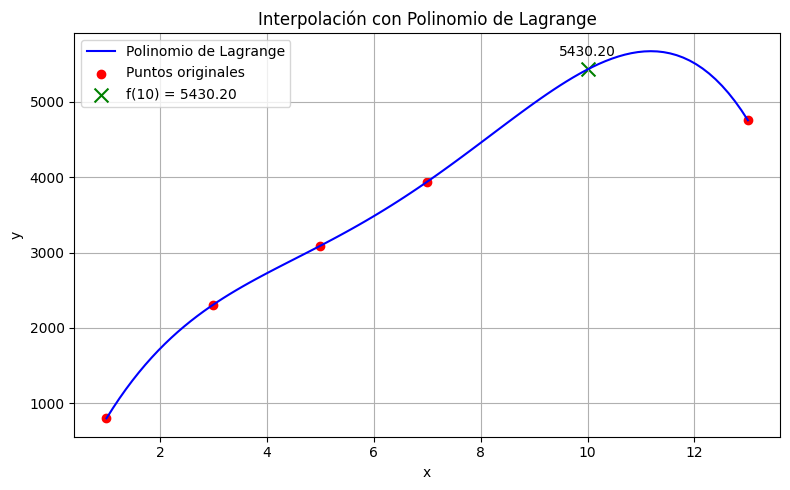

In [2]:
from Interpolacion_De_Lagrange import *
# Datos
x = np.array([1, 3, 5, 7, 13])
y = np.array([800,2310,3090,3940,4755])
# Puntos generados por el polinomio de Lagrange
interpolacion_lagrange(x, y,graficar=True,point_to_evaluate=10)


N. 02) Desarrolle, depure y pruebe un programa amigable para el usuario en cualquier lenguaje de
alto nivel o de macros de su predilección, para implementar el método de la interpolación de
Lagrange para interpolar los siguientes datos:


$$
\begin{array}{|c|c|c|c|c|c|}
\hline
x & 1.6 & 2.0 & 2.5 & 3.2 & 4.0  \\
\hline
f(x) & 2.0 & 8.0 & 14.0 & 15.0 & 8.0    \\
\hline
\end{array}
$$
Muestre la gráfica que ajusta los datos

El polinomio resultante es: 2.0*(1.66666666666667 - 0.416666666666667*x)*(2.0 - 0.625*x)*(2.77777777777778 - 1.11111111111111*x)*(5.0 - 2.5*x) + 8.0*(2.0 - 0.5*x)*(2.66666666666667 - 0.833333333333333*x)*(5.0 - 2.0*x)*(2.5*x - 4.0) + 14.0*(2.66666666666667 - 0.666666666666667*x)*(4.57142857142857 - 1.42857142857143*x)*(1.11111111111111*x - 1.77777777777778)*(2.0*x - 4.0) + 15.0*(5.0 - 1.25*x)*(0.625*x - 1.0)*(0.833333333333333*x - 1.66666666666667)*(1.42857142857143*x - 3.57142857142857) + 8.0*(0.416666666666667*x - 0.666666666666667)*(0.5*x - 1.0)*(0.666666666666667*x - 1.66666666666667)*(1.25*x - 4.0)


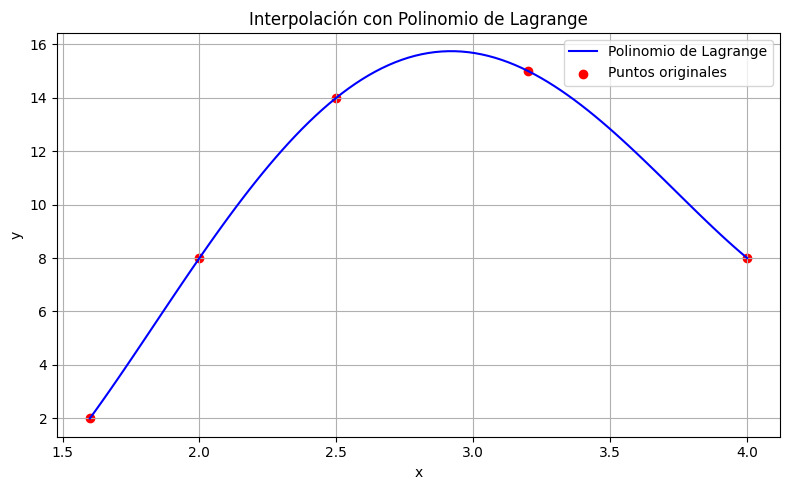

In [3]:
# Datos
x = np.array([1.6,2.0,2.5,3.2,4.0])
y = np.array([2.0,8.0,14.0,15.0,8.0])

# Puntos generados por el polinomio de Lagrange
interpolacion_lagrange(x, y,graficar=True)



## 3. Interpolación con Splines Cúbicos

### Idea general

Para superar las limitaciones de los polinomios globales, la interpolación con splines usa **funciones por tramos**: en lugar de un único polinomio de grado alto, se usan varios polinomios cúbicos definidos en cada subintervalo $[x_i, x_{i+1}]$, que se ajustan de manera suave.

### Definición

Un **spline cúbico** $S(x)$ es una función compuesta por polinomios cúbicos $S_i(x)$ en cada intervalo $[x_i, x_{i+1}]$, que cumple:

- $S_i(x_i) = y_i$ y $S_i(x_{i+1}) = y_{i+1}$ (pasa por los puntos)
- $S_i(x)$ es un polinomio de grado 3 en $[x_i, x_{i+1}]$
- $S(x)$ es $C^2$, es decir, tiene derivadas primera y segunda continuas en todos los puntos interiores $x_i$
- Condiciones de frontera específicas (como spline natural con segunda derivada cero en los extremos)

### Ventajas

- **Suavidad:** Al ser $C^2$, la función es suave y evita oscilaciones bruscas.
- **Localidad:** Cambiar un punto afecta solo los splines vecinos.
- **Estabilidad numérica:** Mejor comportamiento con muchos puntos.

### Cálculo

- Se plantea un sistema lineal para determinar las segundas derivadas en los puntos de interpolación.
- A partir de estas segundas derivadas, se definen los coeficientes de los polinomios cúbicos en cada intervalo.
- El resultado es una función compuesta, evaluable fácilmente.

---


### Ejercicios 

Ejemplo 

In [4]:
from Interpolacion_Splines import Splines
# Datos de ejemplo
xi = [0.1, 0.2, 0.3, 0.4]
y = [1.45, 1.8, 1.7, 2]
# Crear objeto Metodos; el tercer argumento es el punto a evaluar, por ejemplo 0.25
metodo = Splines(xi, y, 0.25)

# Obtener splines y dominios
metodo.PolSplines()


La aproximación en x = 0.25 es: 1.7537500000000033
Los polinomios son:
-146.666666666667*x**3 + 44.0*x**2 + 0.566666666666666*x + 1.1 en [0.1, 0.2]
283.333333333333*x**3 - 214.0*x**2 + 52.1666666666667*x - 2.34 en [0.2, 0.3]
-136.666666666667*x**3 + 164.0*x**2 - 61.2333333333333*x + 9.0 en [0.3, 0.4]


N. 03) Desarrolle, depure y pruebe un programa amigable para el usuario en cualquier lenguaje de
alto nivel o de macros de su predilección, para implementar el método de trazadores cúbicos para
interpolar los siguientes datos:
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
x & 3.0 & 4.5 & 7.0 & 9.0  \\
\hline
f(x) & 2.5 & 1.0 & 2.5  & 0.5     \\
\hline
\end{array}
$$
Utilizando este programa calcule el resultado para $f(5.2)$

In [5]:
#datos del problema
xi = [3.0,4.5,7.0,9.0]
y = [2.5,1.0,2.5,0.5]
val = 5.2
#mandamos los datos al método de interpolación
metodo = Splines(xi,y,val)
metodo.PolSplines()


La aproximación en x = 5.2 es: 1.2256054752851657
Los polinomios son:
0.186565272496831*x**3 - 1.67908745247148*x**2 + 3.61749049429658*x + 1.72205323193916 en [3.0, 4.5]
-0.214144486692015*x**3 + 3.73049429657795*x**2 - 20.7256273764259*x + 38.2367300380228 en [4.5, 7.0]
0.127756653992395*x**3 - 3.44942965779468*x**2 + 29.5338403041825*x - 79.0353612167301 en [7.0, 9.0]


N. 04) Desarrolle, depure y pruebe un programa amigable para el usuario en cualquier lenguaje de
alto nivel o de macros de su predilección, para implementar el método de trazadores cúbicos para
interpolar los siguientes datos:
$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 0.0 & 0.6 & 1.5 & 1.7 & 1.9 & 2.1 & 2.3 & 2.6 & 2.8 & 3.0 & 3.6 &  \\
\hline
f(x) & -0.80 &-0.34 & 0.59 & 0.59 & 0.23 & 0.1 & 0.28 & 1.03 & 1.50 & 1.44 & 0.74 \\
\hline
\end{array}
$$
Muestre la gráfica que ajusta los datos y los polinomios de cada intervalo.

In [6]:
 
xi = [0.0,0.6,1.5,1.7,1.9,2.1,2.3,2.6,2.8,3.0,3.6]
y = [-0.80,-0.34,0.59,0.59,0.23,0.1,0.28,1.03,1.50,1.44,0.74]

metodo = Splines(xi,y,0.23)
metodo.PolSplines()


La aproximación en x = 0.23 es: -0.6448956210804782
Los polinomios son:
0.300552920218758*x**3 + 0.658467615387914*x - 0.8 en [0.0, 0.6]
-0.539045884747194*x**3 + 1.51127784893871*x**2 - 0.248299093975314*x - 0.618646658127355 en [0.6, 1.5]
-11.6022251078134*x**3 + 51.2955843527366*x**2 - 74.9247588496721*x + 36.719583219721 en [1.5, 1.7]
22.1554118633035*x**3 - 120.86836419996*x**2 + 217.753953689911*x - 129.131687219376 en [1.7, 1.9]
-3.26942234540057*x**3 + 24.0531907896536*x**2 - 57.5970007903538*x + 45.257250618125 en [1.9, 2.1]
0.922277518298811*x**3 - 2.35451835165244*x**2 - 2.14081159361097*x + 6.43791818040502 en [2.1, 2.3]
-4.08563512858584*x**3 + 32.2000789118516*x**2 - 81.6163852996703*x + 67.3691913550505 en [2.3, 2.6]
-17.0942404003442*x**3 + 133.667200031567*x**2 - 345.43090021093*x + 296.008437611476 en [2.6, 2.8]
15.8999529129*x**3 - 143.484023799684*x**2 + 430.592526516573*x - 428.28009400086 en [2.8, 3.0]
0.213581990880247*x**3 - 2.30668550150667*x**2 + 7.06051162204


# 4. Comparación entre Lagrange y Splines Cúbicos

| Característica                | Polinomio de Lagrange             | Splines Cúbicos               |
|------------------------------|----------------------------------|-------------------------------|
| Tipo de interpolación         | Polinomio global                 | Funciones por tramos (local)  |
| Suavidad                     | Suave pero puede oscilar         | Suave y con continuidad $C^2$ |
| Computación                  | Puede ser costosa para muchos puntos | Más eficiente y estable       |
| Modificación local           | No (afecta todo el polinomio)    | Sí (solo intervalos vecinos)  |
| Aplicaciones típicas         | Casos con pocos puntos, demostraciones | Interpolación de datos experimentales, gráficos |

---



## 5. Aplicaciones y Consideraciones Finales

- La elección entre Lagrange y Splines depende del problema y del número de puntos.
- Para conjuntos pequeños o teóricos, Lagrange es sencillo y directo.
- Para datos reales y grandes, splines cúbicos son la opción recomendada.
- Ambas técnicas son base para métodos avanzados en ingeniería, ciencias y computación.

---
